In [ ]:
# Test
import mido

def load_midi_data(input_name, target_name):
    input_path  = os.path.join(data_folder, input_name)
    target_path = os.path.join(data_folder, target_name)
    
    input_mid  = mido.MidiFile(input_path)
    target_mid = mido.MidiFile(target_path)
    
    print("="*20, "[Input Midi Data]", "="*20)
    print_midi_info(input_mid)
    
    print()
    
    print("="*20, "[Target Midi Data]", "="*20)
    print_midi_info(target_mid)
    
    return input_mid, target_mid

input_mid = mido.MidiFile('')

## 비교 내용

|이름|방법|
|--|--|
|음정 정확도|방법1. <br> 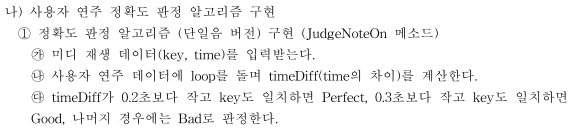<br>방법2<br>점수 = 정확히 친 노트의 개수 / 총 쳐야하는 노트의 개수 x 100|

# csv - 비교?

## 데이터 내용
|종류|sec|tick|bpm|msg_type|channel|note|velocity|dynamic|accent|count|main_vol|depth|pedal|pan|tempo|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|추출|초|틱?|Bit per Minuate|Note on / Note off|?|0~127|?|셈여림|?|?|?|?|페달?|?|템포?|
|큐베이스에서 어떤 것에 해당하는지?|옵션에서 Seconds로 음악 데이터를 보면 확인 가능|틱?|Bit per Minuate|Note on / Note off|?|0~127|?|셈여림|?|?|?|?|페달?|?|템포?|

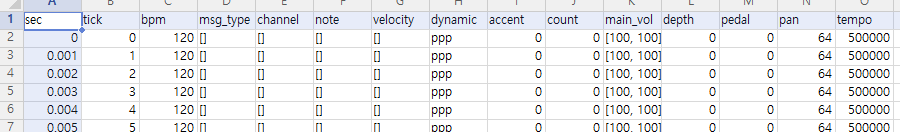



# 큐베이스 상에서 데이터 확대 보기.
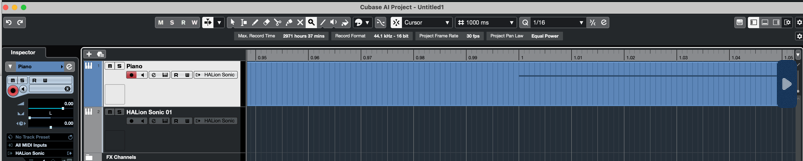

# 엑셀로 추출한 데이터
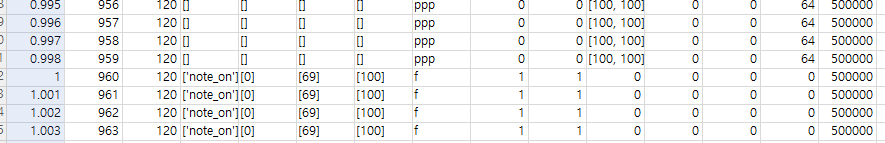

--> 1초에 정확히 노트가 찍힌 것을 볼 수 있음

# 비교 파일

1. butterfly_input_data.csv
2. butterfly_target_data.csv

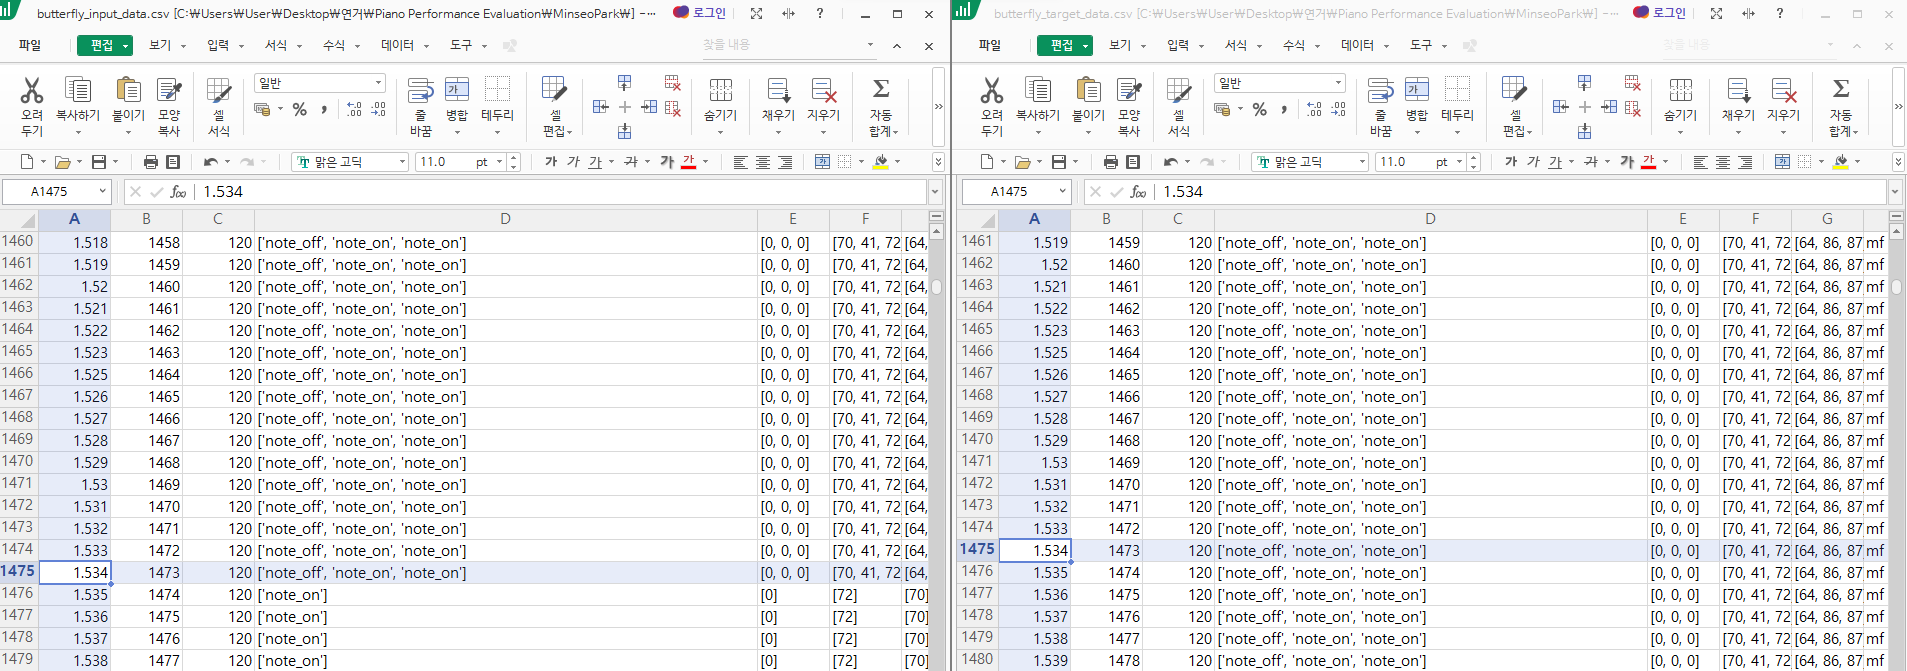


# 음정 비교
## 방법 1
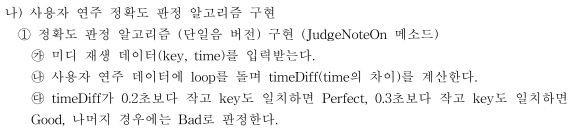

# 데이터 전처리

1. 음정 비교 -> 중복 제거를 통해 음정 데이터만 확보
2. 시간 -> 해당 시간에 음정을 정확히 쳤는가가 중
    - 두 데이터에 대해서 행(즉, 시간정보 or 틱정보)가 다르다면?
        - 행간 비교를 통해 정답 데이터에 없는 시간초를 생성 해 채워준다? -> 어차피 못친거니까 감점 요인
        - 데이터가 밀린 경우에? 전처리 작업 시 도레미파솔라시도를 통해 싱크를 맞춰준다? -> 이미 늦음

|생각|
|--|
|2024.01.18 일단 위 아래 중복 제거를 통해 데이터를 간단히|
        

In [65]:
import pandas as pd

input_path = './butterfly_input_data.csv'
target_path = './butterfly_target_data.csv'

input_data = pd.read_csv(input_path)
target_data = pd.read_csv(target_path)

In [6]:
# 데이터 확인해주기
print('input_data')
input_data.head()

input_data


,sec,tick,bpm,msg_type,channel,note,velocity,dynamic,accent,count,main_vol,depth,pedal,pan,tempo
0,0.000,0,120.0,[],[],[],[],ppp,0,0,100,0,0,64,500000
1,0.001,1,120.0,[],[],[],[],ppp,0,0,100,0,0,64,500000
2,0.002,2,120.0,[],[],[],[],ppp,0,0,100,0,0,64,500000
3,0.003,3,120.0,[],[],[],[],ppp,0,0,100,0,0,64,500000
4,0.004,4,120.0,[],[],[],[],ppp,0,0,100,0,0,64,500000


In [7]:
print('target_data')
target_data.head()

target_data


,sec,tick,bpm,msg_type,channel,note,velocity,dynamic,accent,count,main_vol,depth,pedal,pan,tempo
0,0.000,0,120.0,[],[],[],[],ppp,0,0,100,0,0,64,500000
1,0.001,1,120.0,[],[],[],[],ppp,0,0,100,0,0,64,500000
2,0.002,2,120.0,[],[],[],[],ppp,0,0,100,0,0,64,500000
3,0.003,3,120.0,[],[],[],[],ppp,0,0,100,0,0,64,500000
4,0.004,4,120.0,[],[],[],[],ppp,0,0,100,0,0,64,500000


# 데이터 전처리
- 위 아래 중복 제거
1. 위 아래 note 열 값이 같으면 제거

In [14]:
def ridOfDupRow(midiData):
    for i in range(len(midiData)-1):
        if midiData['note'][i] == midiData['note'][i+1] or midiData['msg_type'][i] == '[]':
            midiData = midiData.drop(i)
    return midiData

In [15]:
# 확인
input_data = ridOfDupRow(input_data)
target_data = ridOfDupRow(target_data)

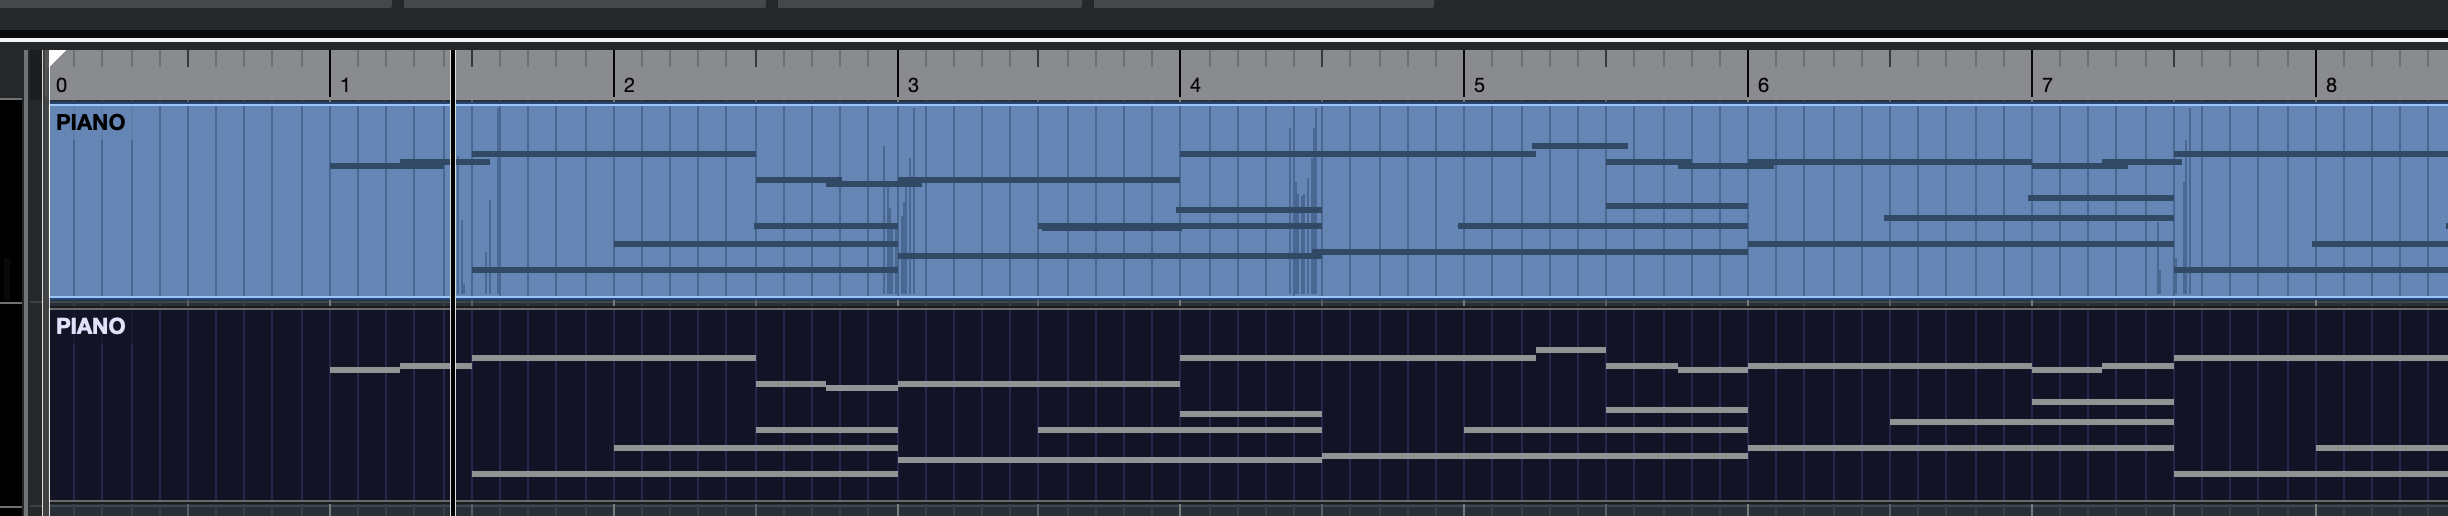

In [16]:
input_data.head()

,sec,tick,bpm,msg_type,channel,note,velocity,dynamic,accent,count,main_vol,depth,pedal,pan,tempo
1199,1.248,1199,120.0,['note_on'],[0],[69],[75],mf,0,1,0,0,0,0,500000
1219,1.269,1219,120.0,"['note_off', 'note_on']","[0, 0]","[69, 70]","[64, 100]",mf,0,2,0,0,0,0,500000
1344,1.400,1344,120.0,['note_on'],[0],[70],[68],mp,0,1,0,0,0,0,500000
1395,1.453,1395,120.0,['note_off'],[0],[69],[64],mp,0,1,0,0,0,0,500000
1473,1.534,1473,120.0,"['note_off', 'note_on', 'note_on']","[0, 0, 0]","[70, 41, 72]","[64, 86, 87]",mf,1,3,0,0,0,0,500000


In [17]:
target_data.head()

,sec,tick,bpm,msg_type,channel,note,velocity,dynamic,accent,count,main_vol,depth,pedal,pan,tempo
1199,1.248,1199,120.0,['note_on'],[0],[69],[100],f,1,1,0,0,0,0,500000
1439,1.498,1439,120.0,"['note_off', 'note_on']","[0, 0]","[69, 70]","[64, 100]",mf,0,2,0,0,0,0,500000
1919,1.998,1919,120.0,"['note_off', 'note_on', 'note_on']","[0, 0, 0]","[70, 41, 72]","[64, 86, 87]",mf,0,3,0,0,0,0,500000
2399,2.498,2399,120.0,['note_on'],[0],[48],[91],f,0,1,0,0,0,0,500000
2639,2.748,2639,120.0,"['note_off', 'note_on', 'note_on']","[0, 0, 0]","[72, 53, 65]","[64, 96, 94]",mf,0,3,0,0,0,0,500000


In [18]:
# 중복 제거한 데이터 프레임 정보 확인
def dataInfo(midiData):
    print('데이터 길이: ', len(midiData))

print(dataInfo(input_data))
print(dataInfo(target_data))

데이터 길이:  235
None
데이터 길이:  67
None


In [20]:
# note 데이터만 가져오기
input_note = input_data['note'].to_list()
target_note = target_data['note'].to_list()

# 악센트

- 'accent' (악센트): velocity가 76~127, 이전 노트의 velocity 평균보다 20% 더 클 때 accent 1(O), 아니면 0(X) -> 그 때 0->1로 바뀌는 거고, 1이 지속되는 이유랑, 0으로 내려가는 이유가 뭐지? -> 의미가 없는 것 -> 추출된 데이터 상에서만 유지되는 개념이 존재함 실제로는 치고 안치고 두개

- Compare 클래스 작성 -> 
    1. accent 비교 함수 작성 완료 (단순 행간 비교를 통한 점수 추출) -> 근데 사실 악센트는 해당 부분에 악센트 있게 쳤냐 안쳤냐 문제아닌가?

### 문제점?
- 행의 개수가 틀리면 알고리즘 작동 여부?
- 싱크를 맞추어 행의 개수를 맞추어야 한다.
    - 데이터 상에서 할 수 있는 일 : input_data의 행의 수를 target_data의 행의 수에 일치시킨다.
    

In [128]:
import pandas as pd

class Compare:
    
    
    def __init__(self, input_data, target_data):
        self.input_data = pd.read_csv(input_data)
        self.target_data = pd.read_csv(target_data)
        
    
    # 단순히 0번 인덱스부터 차례로 진행하면서 행간 accent 값을 비교한다.
    # 행간 accent 값이 일치하면 + 1 = accent_score
    # 그 후에 점수 = accent_score / 총 행수 * 100 
    def normalCompareAccent(self):
        
        accent_score = 0
        
        invalid_list = []
        
        if len(self.input_data) != len(self.target_data):
            print('CSV 파일 행의 길이가 다릅니다.')
            return 'Error'
        else:
            for i in range(len(self.input_data)):
                if self.input_data['accent'][i] == self.target_data['accent'][i]:
                    accent_score = accent_score +1
                else:
                    invalid_list.append(input_data['sec'][i])
                    
            accent_score = int(accent_score / len(self.input_data) * 100)
            print('악센트 비교 결과 : ',accent_score,'% 일치합니다.')
            # print('잘못된 부분 : ', invalid_list)
            
    # 악센트 = 1 일때 시간초를 추출해서 해당 시간 초에 accent가 시작되면 1점
    
    '''
     알고리즘 설명
        1.target_data에서 악센트가 =1 (on) 시작점을 추출한다 = target_time_range
        2. 마찬가지로 input_data에서 악센트가 =1 (on)이 된 시작점을 모두 추출한다. = input_time_range
        3. input_time_range를 순회하면서 악센트를 준 시간 초가 target_time_range에 있다면 + 1점을 준다. = accent_score
        4. 점수 = accent_score / len(target_time_range) * 100
            - why? 악센트를 준 순간 = target_time_range의 수를 다 쳤으면 100%
    '''

    
    def version2CompareAccent(self):
        accent_score = 0
        
        input_time_range = []
        target_time_range = []
        
        start = 0
        end = 0

        isAccent = False

        for i in range(len(self.input_data)):
            # accent on
            if self.input_data['accent'][i] == 1 and isAccent == False:
                start = self.input_data['sec'][i]
                isAccent = True

            if self.input_data['accent'][i] == 0 and isAccent == True:
                end = self.input_data['sec'][i]
                isAccent = False
                input_time_range.append([start])
                start = 0
                end = 0

        start = 0
        end = 0

        isAccent = False

        for i in range(len(self.target_data)):
            # accent on
            if self.target_data['accent'][i] == 1 and isAccent == False:
                start = self.target_data['sec'][i]
                isAccent = True

            if self.target_data['accent'][i] == 0 and isAccent == True:
                end = self.target_data['sec'][i]
                isAccent = False
                target_time_range.append([start])
                start = 0
                end = 0
        
        accent_score = 0
        
        for i in input_time_range:
            if i in target_time_range:
                accent_score += 1
        accent_score = int(accent_score / len(target_time_range) * 100)
        print('악센트 비교 결과 : ',accent_score,'% 모든 구간에서 정확히 악센트를 주었습니다.')

In [129]:
# 비교 알고리즘 실행.

# Compare (input data, target data)
compare = Compare('./butterfly_input_data.csv', './butterfly_target_data.csv')

In [130]:
compare.normalCompareAccent() # 단순 행간 비교

악센트 비교 결과 :  77 % 일치합니다.


In [131]:
# version 2 compare

compare.version2CompareAccent()

악센트 비교 결과 :  100 % 모든 구간에서 정확히 악센트를 주었습니다.


# 빠르기의 변호(Change of speed)

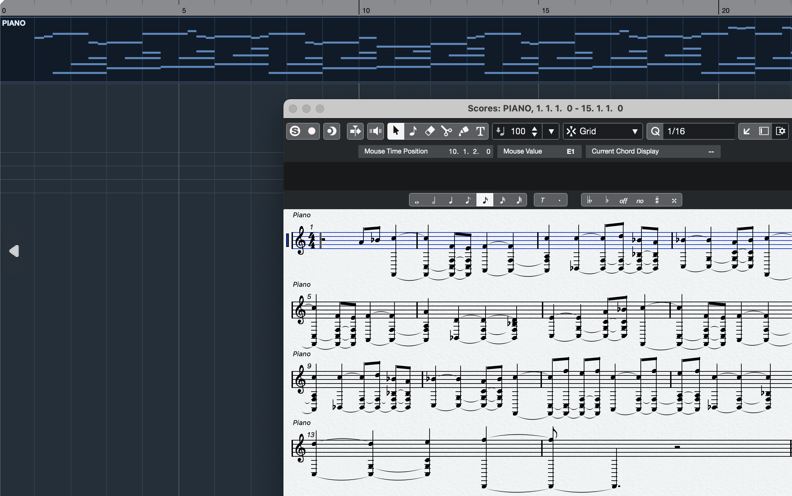

# 이음줄 표시가 안되어 있는 악보에서 데이터 추출
-> 저런식으로 데이터가 구성되면 이음줄이 표시 안되어 있음
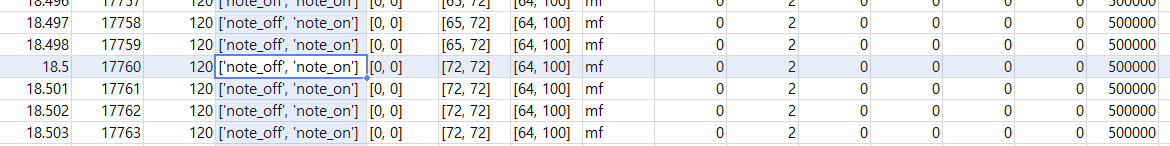

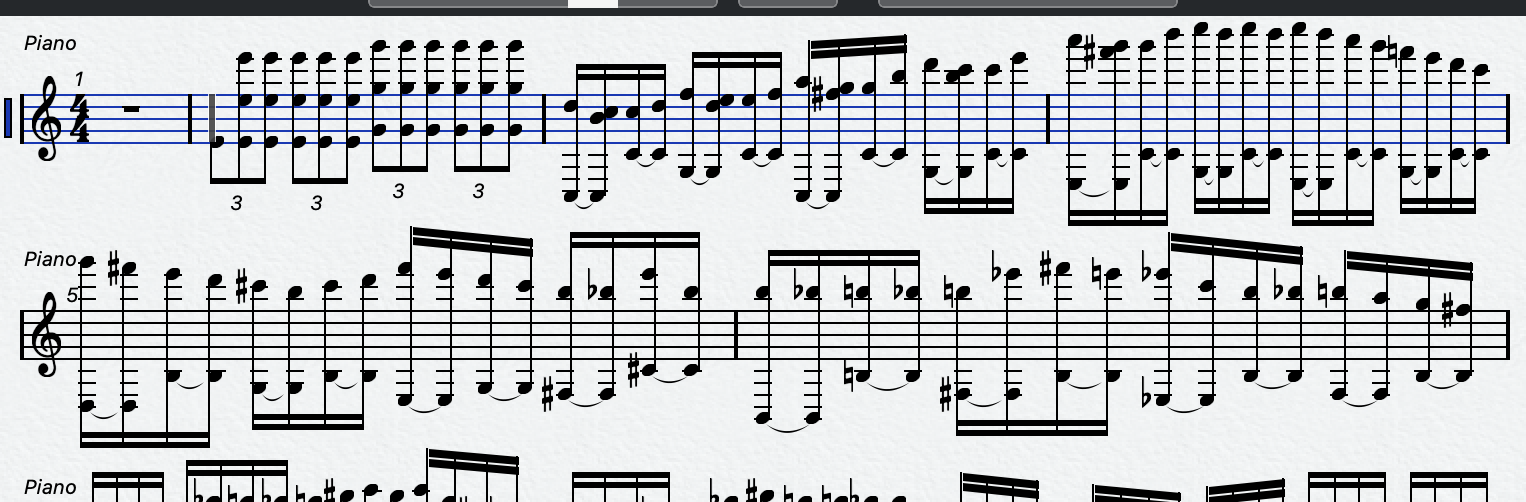


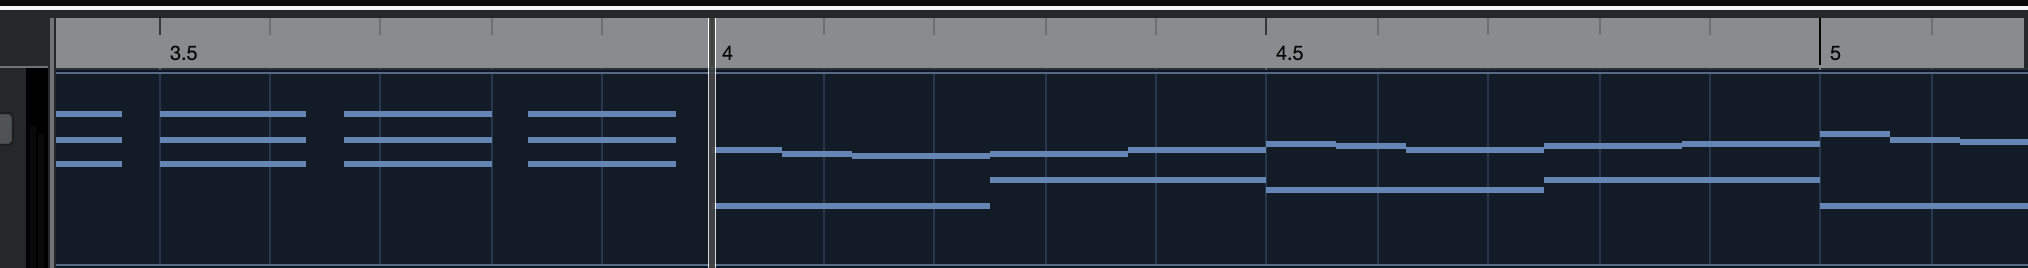

# 이음줄

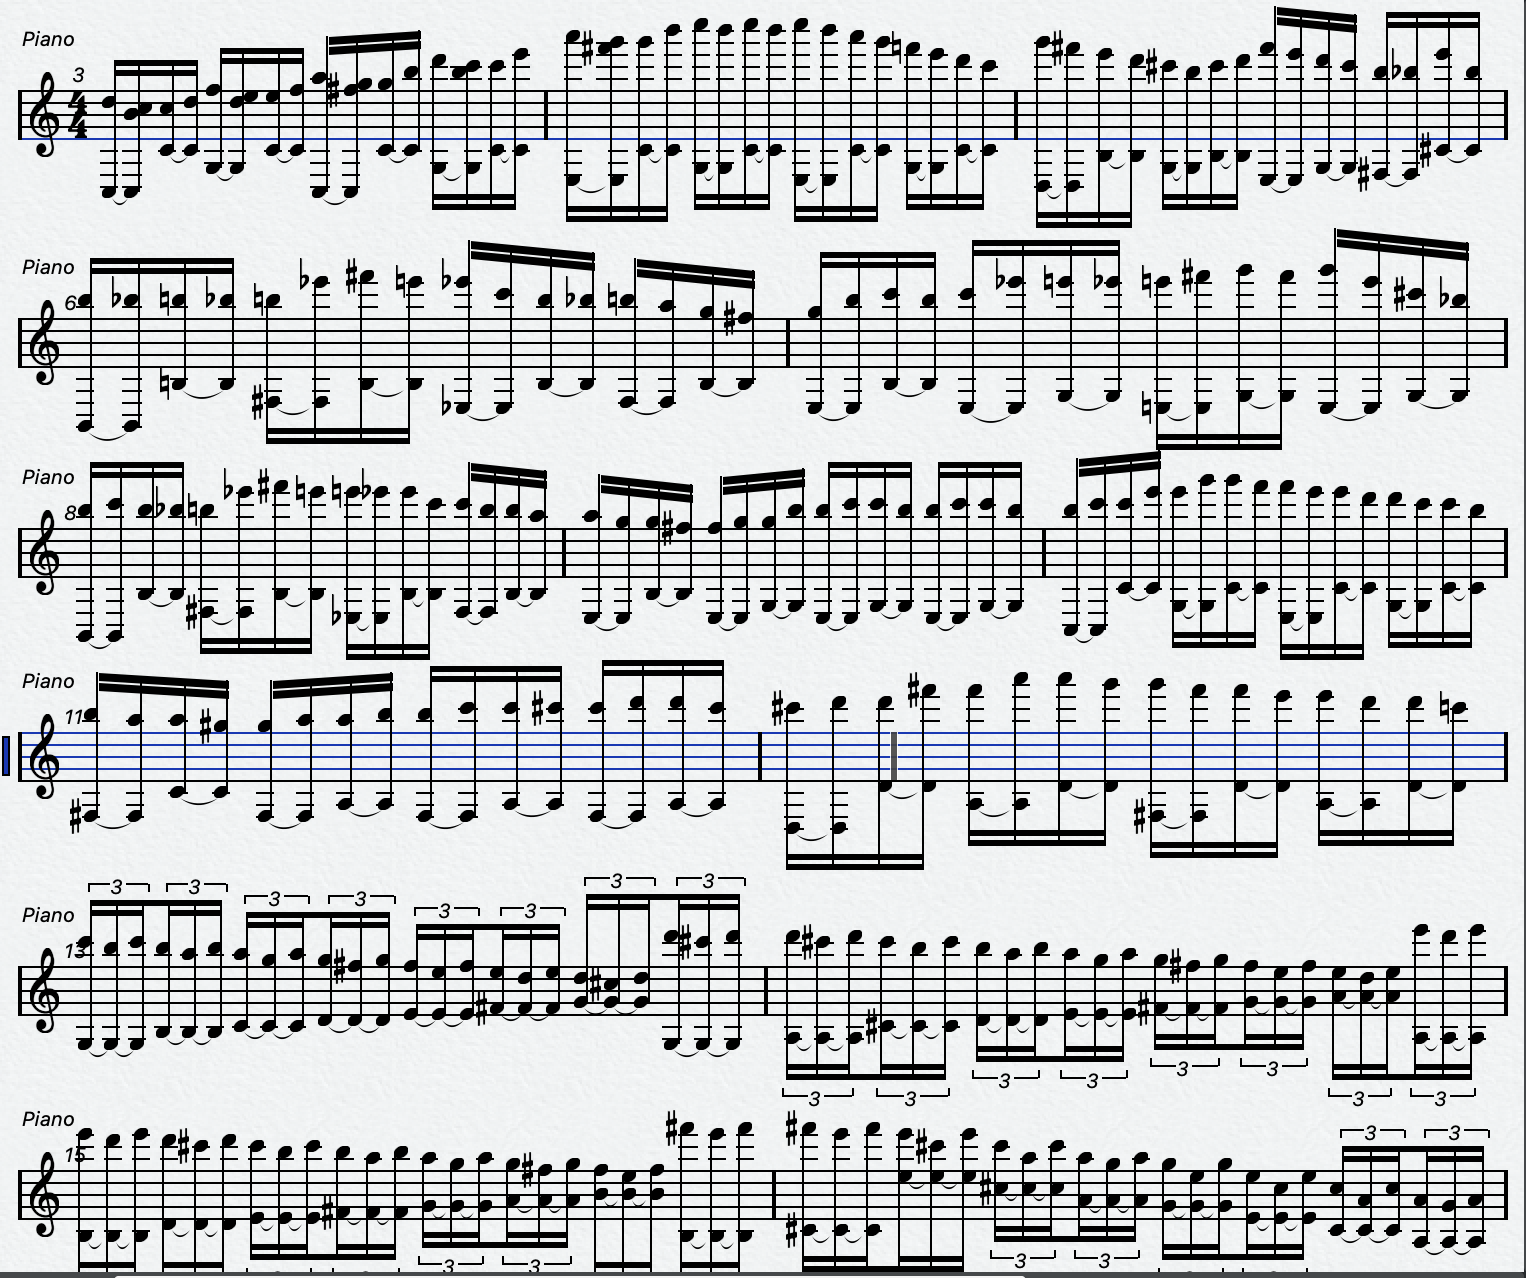
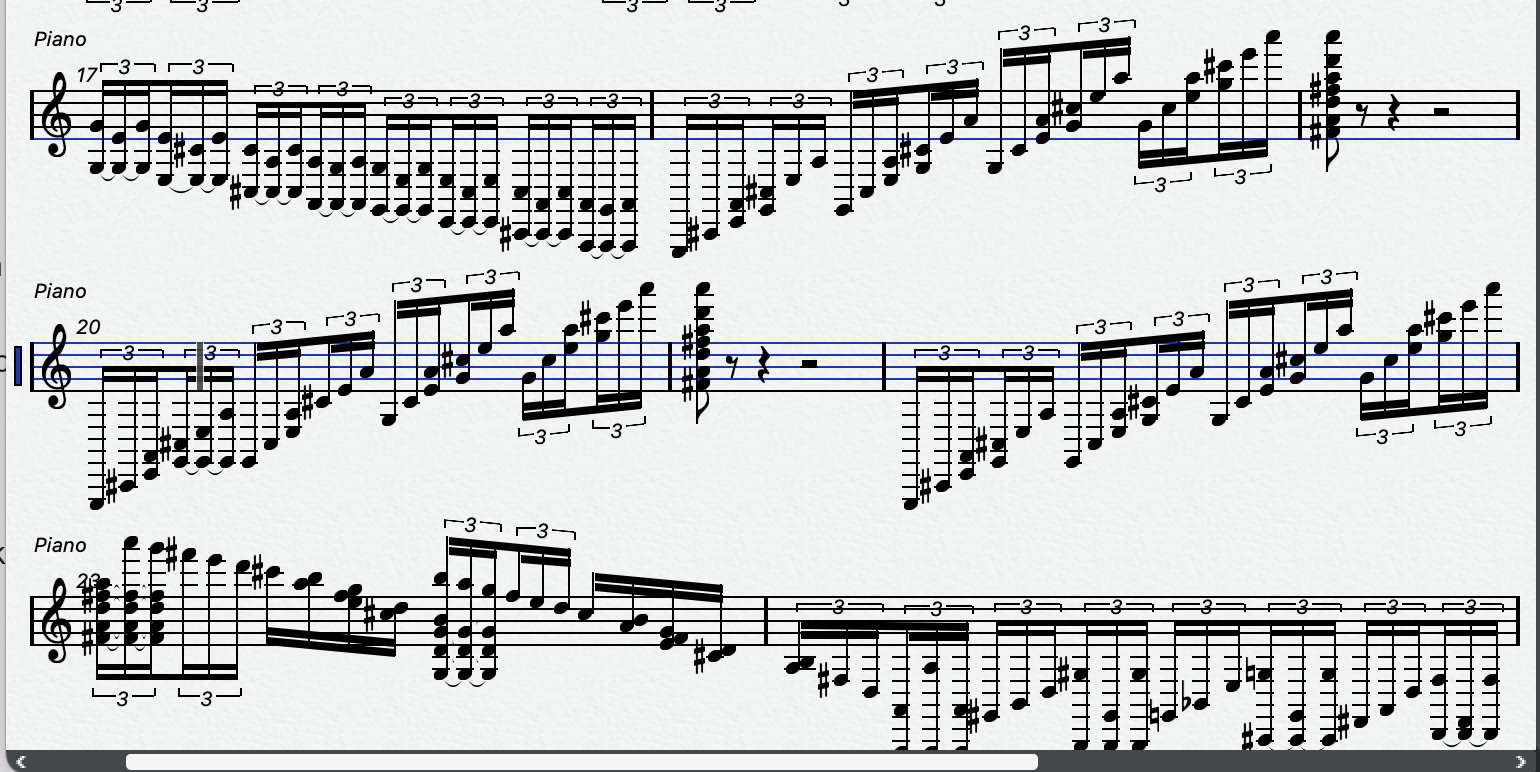
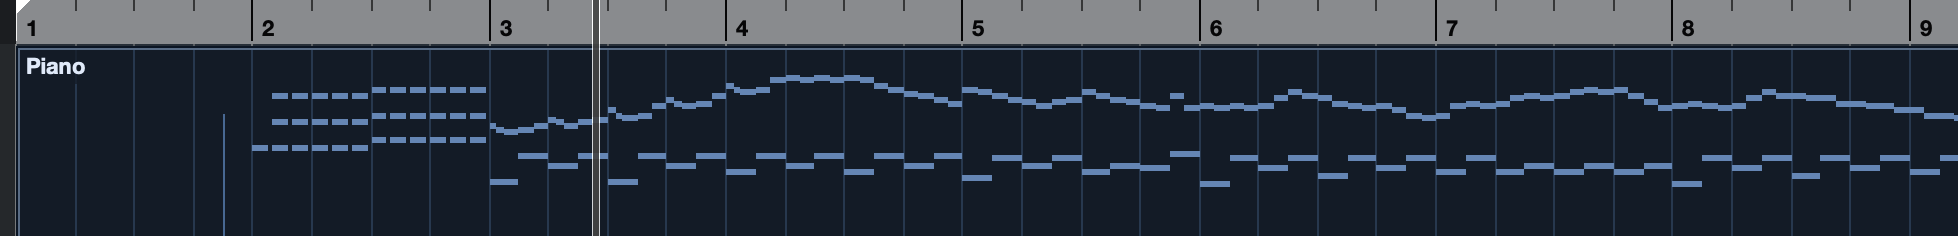

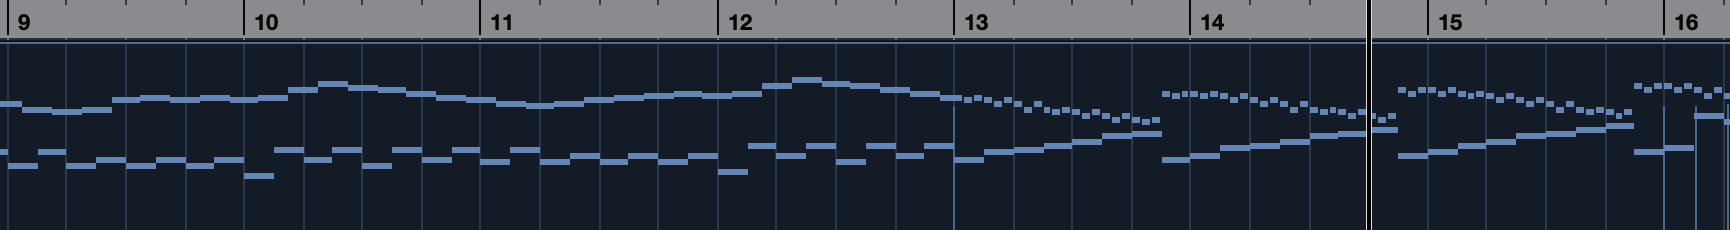
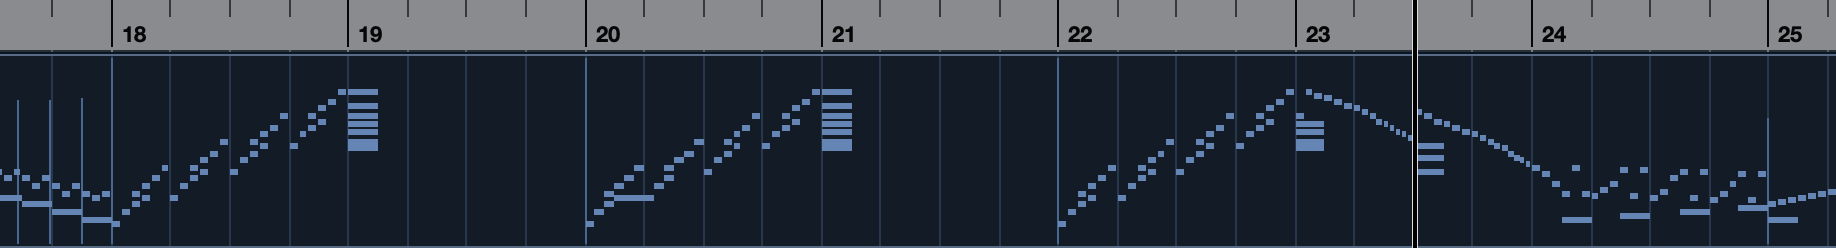
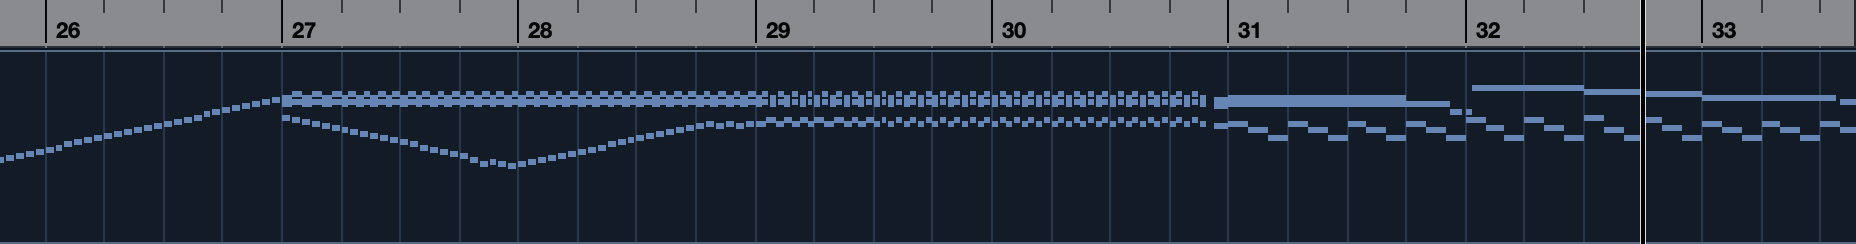

# 시간 초에 따른 note_on인 상태 추출하기

In [13]:
# note on인 상태를 추출해보자
#

import re
import pandas as pd
import time

input_path = './test_data_ve.csv'
input_data = pd.read_csv(input_path)

print(len(input_data))

def findNoteOnOffIndex(rowData):
    
    #print('note_on의 개수: ', rowData.count('note_on'))
    
    msg = rowData.split(',')
    
    note_on_indices = []
    note_off_indices = []
        
    for i in range(len(msg)):
        if 'note_on' in msg[i]:
            note_on_indices.append(i)
        if 'note_off' in msg[i]:
            note_off_indices.append(i)

    #print('note_on이 존재하는 인덱스: ',note_on_indices)
    #print('note_off가 존재하는 인덱스: ',note_off_indices)
    #print('실제 데이터', rowData) 
        
    return [note_on_indices, note_off_indices] # note_on의 인덱스를 반환
        
        

def getNoteOnNote(csv_data):
    
    timeToPianoNoteOnData = []
    piano_note_on_list = []
    
    for j in range(len(csv_data)):
        # note_on, note_off index 추출
        note_on_indices, note_off_indices = findNoteOnOffIndex(csv_data['msg_type'][j])


        # note 값 추출
        notes = csv_data['note'][j]
        int_notes = [] ### 

        for i in notes.split(','):
            int_notes.append(re.sub(r'[^0-9]','', i))


        # note_on은 추가 note_off는 제거
        
        
        if len(note_off_indices) != 0:
           
            for i in note_off_indices:
                # note_off 반복으로 인한 note값이 있을 때만 지우기
                if int_notes[i] in piano_note_on_list:
                    piano_note_on_list.remove(int_notes[i])
                else:
                    pass
        if len(note_on_indices) != 0:
            # note_on 인덱스가 존재하면 추가 단, 이미 존재하는 노트의 경우는 추가하면 안된다.
            # note_on이 있는지 검사 
            
            for i in note_on_indices:
                if int_notes[i] in piano_note_on_list: # 있으면 pass 중복되니까
                    pass
                else:
                    piano_note_on_list.append(int_notes[i])
        
        
        timeToPianoNoteOnData.append(piano_note_on_list.copy())
    
    return timeToPianoNoteOnData




66241


# getNoteOnNote()
- input_data -> csv_data (pd.read_csv('')
- output_data -> csv 파일로 저장

In [15]:
findNoteOnOffIndex(input_data['msg_type'][2609])

note_status = getNoteOnNote(input_data)

input_data['note_status'] = note_status
input_data.to_csv('./minseo.csv')

# 기존
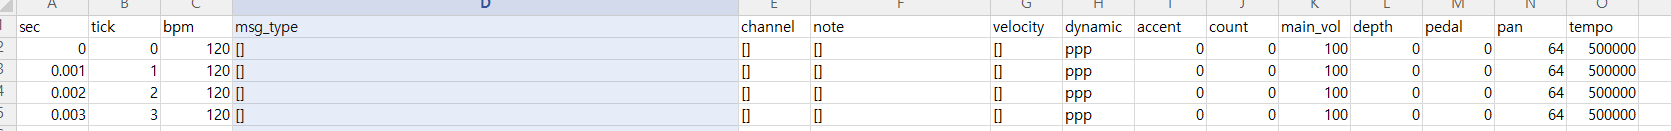

# 수정
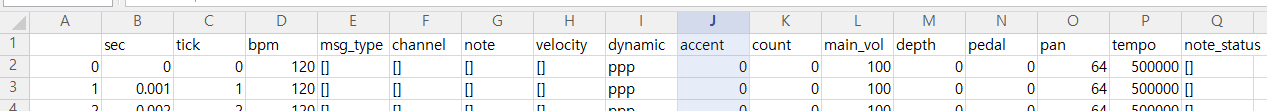